In [6]:
#Imports
import librosa
import librosa.display
%matplotlib inline
from pathlib import Path
from sklearn.preprocessing import scale, normalize, StandardScaler,MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
import pandas as pd
import matplotlib.pyplot as plt

Obtain and plot Mel Spectrogram

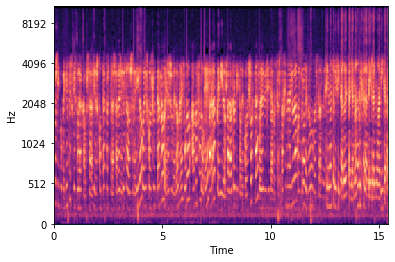

In [87]:
#Step by step stuff
file='/home/javio/Audio/CommonVoice/amznat.wav'
#Load audio
y, sr = librosa.load(file,sr=16000, mono=True)
#Display waveplot
librosa.display.waveplot(y, sr=16000)
#Obtain Mel spectrogram
n_fft=2048;hop_length=512;n_mels=128
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
#Transform Mel Spectrogram to dB
S_DB = librosa.power_to_db(S, ref=np.max)
#Show Mel Spectrogram in dB units
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');

In [88]:
#How to calculate the MFCC parameters
M=librosa.feature.mfcc(y, sr=sr,n_mfcc=100)
#alternative to mffcs which is the same if we eliminate ref=np.max
mfccs=librosa.feature.mfcc(S=librosa.power_to_db(S,ref=np.max));
#M==(mfccs)

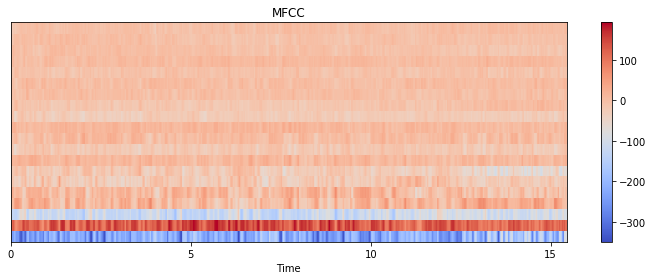

In [51]:
#How to plot MFCCs
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(M, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [2]:
#Definition of functions to get, plot and save MFCCs
def get_mfcc(file,n_mfcc=100):
    y, sr = librosa.load(file, mono=True, sr=16000)
    return librosa.feature.mfcc(y, sr=sr, n_mfcc=n_mfcc)
    
def plot_mfcc(mfccs):
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()

def save_scale_mfccs(file,dest='/mfc/', **kwargs):
    path = Path(file)
    plot_mfcc(scale(get_mfcc(path,**kwargs), axis=1))
    plot = str(path.parent) + (dest) + str(path.name)
    if not os.path.exists(str(path.parent) + (dest)):
        os.mkdir(str(path.parent) + (dest))
    plt.savefig(Path(plot).with_suffix('.png'))
    plt.clf()

In [213]:
folder='/home/javio/Audio/CommonVoice/Spanish/waveplots/inference/proc/'
for file in Path(folder).iterdir():
    if file.is_file():
        save_scale_mfccs(file,n_mfcc=100)

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

In [3]:
#Load train and val df
train_df = pd.read_csv('syndf.csv',sep='\t')
val_df = pd.read_csv('short_valdf.csv',sep='\t')

In [228]:
folder='/home/javio/Audio/CommonVoice/Spanish/clips/proc/'
for file in Path(folder).iterdir():
    try:
        if file.is_file():
            save_scale_mfccs(file,n_mfcc=100)
    except ValueError as e:
        print('ValueError exception')

ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception
ValueError exception


<Figure size 432x288 with 0 Axes>

In [231]:
folder='/home/javio/Audio/CommonVoice/Spanish/clips/proc/mfc'
empty=[]
from PIL import Image
for file in Path(folder).iterdir():
    Image.open(file)
    if not (os.path.getsize(file) > 0):empty.append(image)
assert len(empty) == 0

In [233]:
df.synpath

0        /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
1        /home/javio/Audio/CommonVoice/Spanish/SYNclips...
2        /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
3        /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
4        /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
                               ...                        
13216    /home/javio/Audio/CommonVoice/Spanish/SYNclips...
13217    /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
13218    /home/javio/Audio/CommonVoice/Spanish/SYNclips...
13219    /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
13220    /home/javio/Audio/CommonVoice/Spanish/SYNPolly...
Name: synpath, Length: 13221, dtype: object

In [234]:
for file in df.synpath:
    file=Path(file)
    try:
        if file.is_file():
            save_scale_mfccs(file,n_mfcc=100)
    except ValueError as e:
        print('ValueError exception')

<Figure size 432x288 with 0 Axes>

I need to copy the mfc folders in SYNclips and SYNPollyclips to mfc/train/synthetic DONE!

Now I just need to execute the mfc code to obtain the validation mfcs, natural and synthetics  

from clips/valproc/ and SYNGoo/valproc/

In [7]:
folder='/home/javio/Audio/CommonVoice/Spanish/clips/valproc/'
folder2='/home/javio/Audio/CommonVoice/Spanish/SYNGoo/valproc/'

for file in Path(folder).iterdir():
    file=Path(file)
    try:
        if file.is_file():
            save_scale_mfccs(file,n_mfcc=100)
    except ValueError as e:
        print('ValueError exception')
        

for file in Path(folder2).iterdir():
    file=Path(file)
    try:
        if file.is_file():
            save_scale_mfccs(file,n_mfcc=100)
    except ValueError as e:
        print('ValueError exception')

ValueError exception


<Figure size 432x288 with 0 Axes>

Move the mfcs to from clips/valproc/ and SYNGoo/valproc/ to /mfccs/valid/natural and synthetic respectively

In [ ]:
n_fft=2048;hop_length=512;n_mels=128
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [ ]:
natfolder = '/home/javio/Audio/Common Voice/Spanish/clips/'
natfile=natfolder+df.path[0]
y, sr = librosa.load(natfile, mono=True, duration=5)
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(10,10))
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
plt.show()